In [1]:
import os

In [2]:
#Load the data
image_dir = "data/"
all_images = [x for x in os.listdir(image_dir) if x.endswith('.jpg')]
categories = set([x[:-8] for x in all_images])
category2images = {category : [] for category in categories}
for img in all_images:
    category2images[img[:-8]].append(img)

In [3]:
all_images

['bagel000.jpg',
 'bagel001.jpg',
 'bagel002.jpg',
 'bagel003.jpg',
 'bagel004.jpg',
 'bagel005.jpg',
 'bagel006.jpg',
 'bagel007.jpg',
 'bagel008.jpg',
 'bagel009.jpg',
 'bagel010.jpg',
 'bagel011.jpg',
 'bagel012.jpg',
 'bagel013.jpg',
 'bagel014.jpg',
 'bagel015.jpg',
 'bagel016.jpg',
 'bagel017.jpg',
 'bagel018.jpg',
 'bagel019.jpg',
 'bagel020.jpg',
 'bagel021.jpg',
 'bagel022.jpg',
 'bagel023.jpg',
 'bagel024.jpg',
 'bagel025.jpg',
 'bagel026.jpg',
 'bagel027.jpg',
 'bagel028.jpg',
 'bagel029.jpg',
 'bagel030.jpg',
 'bagel031.jpg',
 'bagel032.jpg',
 'bagel033.jpg',
 'bagel034.jpg',
 'bagel035.jpg',
 'bagel036.jpg',
 'bagel037.jpg',
 'bagel038.jpg',
 'bagel039.jpg',
 'bagel040.jpg',
 'bagel041.jpg',
 'bagel042.jpg',
 'bagel043.jpg',
 'bagel044.jpg',
 'bagel045.jpg',
 'bagel046.jpg',
 'bagel047.jpg',
 'bagel048.jpg',
 'bagel049.jpg',
 'bagel050.jpg',
 'bagel051.jpg',
 'bagel052.jpg',
 'bagel053.jpg',
 'bagel054.jpg',
 'bagel055.jpg',
 'bagel056.jpg',
 'bagel057.jpg',
 'bagel058.jpg

In [13]:
#import libraries
import re
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import random

In [16]:
total_size = len(dataset)
train_size = int(0.8 * total_size) # 80% for training
test_size = total_size - train_size # 20% for testing

train_set, test_set = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False) 

train_acc_history = []
test_acc_history = []

print(f"Data Split: {len(train_set)} Training images, {len(test_set)} Testing images")

Data Split: 2001 Training images, 501 Testing images


In [17]:
model = ImageLSTM(num_classes=len(dataset.classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20  

for epoch in range(num_epochs):
    
    model.train()
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    train_acc_history.append(train_acc)
    
    
    model.eval() 
    correct_test = 0
    total_test = 0
    
    with torch.no_grad(): 
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            
    test_acc = 100 * correct_test / total_test
    test_acc_history.append(test_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%')

print("Training Complete!")

Epoch [1/20] | Train Acc: 7.15% | Test Acc: 8.38%
Epoch [2/20] | Train Acc: 9.65% | Test Acc: 6.99%
Epoch [3/20] | Train Acc: 10.49% | Test Acc: 7.58%
Epoch [4/20] | Train Acc: 11.59% | Test Acc: 9.78%
Epoch [5/20] | Train Acc: 13.69% | Test Acc: 10.18%
Epoch [6/20] | Train Acc: 14.64% | Test Acc: 9.78%
Epoch [7/20] | Train Acc: 15.59% | Test Acc: 10.58%
Epoch [8/20] | Train Acc: 15.49% | Test Acc: 10.78%
Epoch [9/20] | Train Acc: 16.84% | Test Acc: 11.98%
Epoch [10/20] | Train Acc: 17.34% | Test Acc: 10.78%
Epoch [11/20] | Train Acc: 17.99% | Test Acc: 12.57%
Epoch [12/20] | Train Acc: 19.04% | Test Acc: 12.97%
Epoch [13/20] | Train Acc: 19.09% | Test Acc: 13.57%
Epoch [14/20] | Train Acc: 18.49% | Test Acc: 12.97%
Epoch [15/20] | Train Acc: 20.49% | Test Acc: 14.57%
Epoch [16/20] | Train Acc: 22.49% | Test Acc: 15.37%
Epoch [17/20] | Train Acc: 23.34% | Test Acc: 13.17%
Epoch [18/20] | Train Acc: 24.04% | Test Acc: 17.17%
Epoch [19/20] | Train Acc: 23.99% | Test Acc: 15.77%
Epoch [20

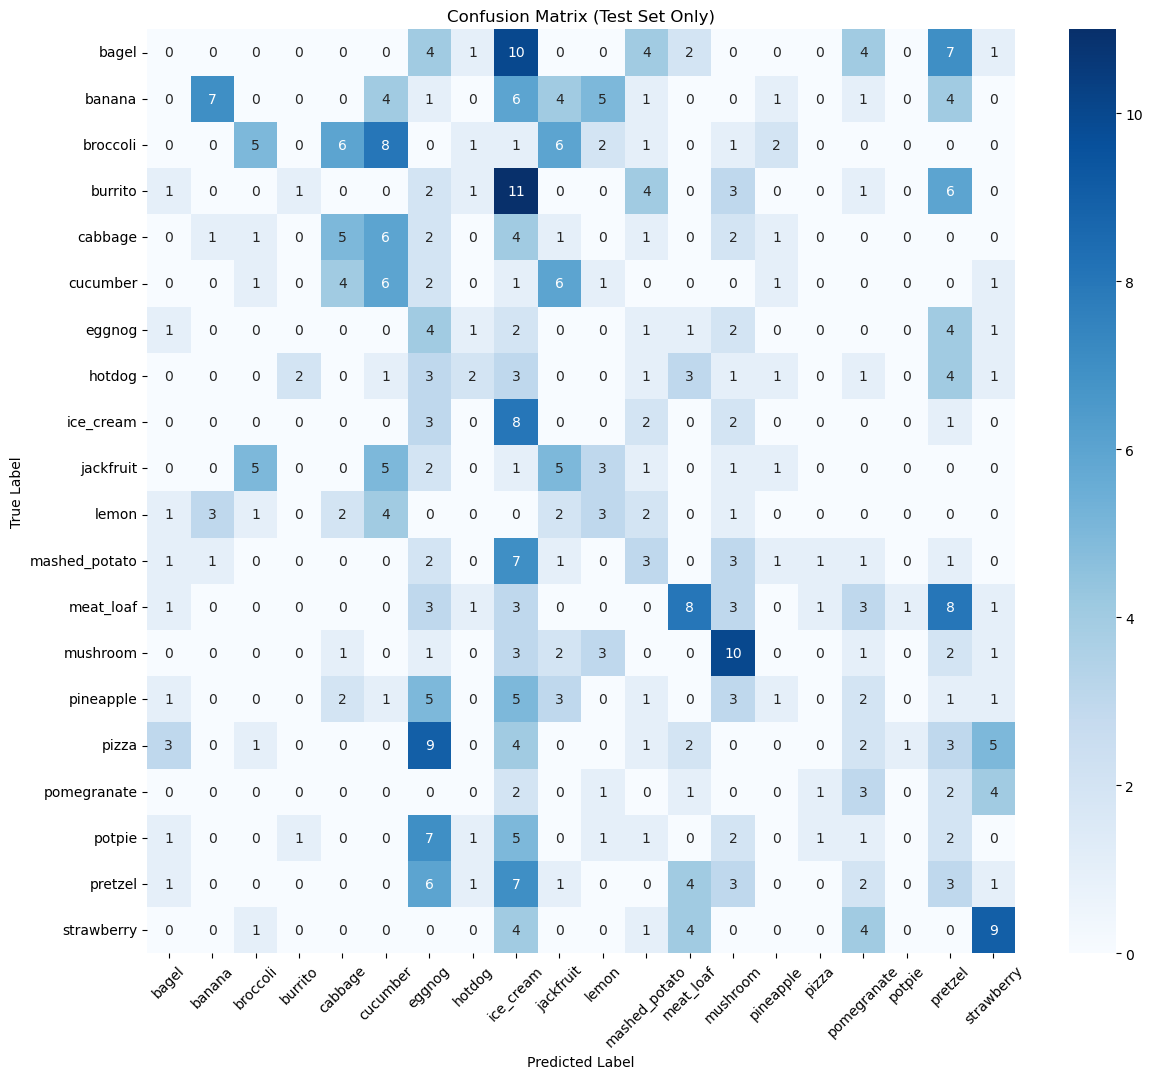

In [19]:
#Confusion Matrix
y_true = []
y_pred = []

model.eval() 

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
       
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.classes,
            yticklabels=dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set Only)')
plt.xticks(rotation=45)
plt.show()

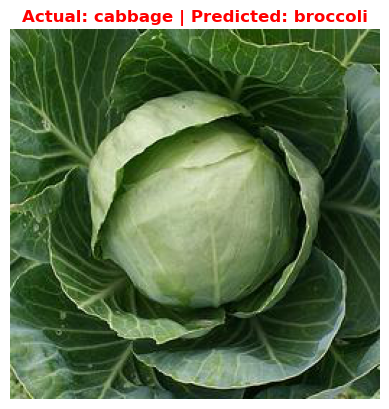

In [44]:
#Generate an image and classify
idx = random.randint(0, len(test_set)-1)


image_tensor, label_idx = test_set[idx]
true_label = dataset.classes[label_idx]


model.eval()
with torch.no_grad():
    
    input_batch = image_tensor.unsqueeze(0).to(device)
    
    
    output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)
    predicted_label = dataset.classes[predicted_idx.item()]


plt.imshow(image_tensor.permute(1, 2, 0))


color = 'green' if predicted_label == true_label else 'red'
plt.title(f"Actual: {true_label} | Predicted: {predicted_label}", color=color, fontweight='bold')
plt.axis('off')
plt.show()